# Eksplorasi Covid-19 Dataset

Eksplorasi sederhana pada dataset "Covid-19 Case Surveillance" (https://www.kaggle.com/arashnic/covid19-case-surveillance-public-use-dataset). Dataset ini berisi kumpulan data pasien individual terdeidentifikasi yang mencakup karakteristik demografis, riwayat paparan, indikator dan hasil keparahan penyakit, data klinis, hasil uji diagnostik laboratorium, dan komorbiditas.

Eksplorasi dilakukan menggunakan fungsi-fungsi dasar pandas, matplotlib, dan seaborn, dengan skenario eksplorasi antara lain:
* Melihat struktur dataset (head, shape, columns, dtypes, describe, missing entries, duplicate entries)
* Operasi kolom (mengubah tipe data, menambah kolom)
* Melihat tanggal laporan kasus paling awal dan paling akhir
* Menghitung jumlah kasus per bulan, jumlah tiap jenis gender, jumlah tiap jenis etnis, jumlah status individu meninggal
* Visualisasi jumlah kasus per bulan, jumlah status individu meninggal per bulan, jumlah status meninggal berdasarkan gender, status pasien dirawat di rumah sakit, dan beberapa visualisasi lainnya

Dari eksplorasi ini dapat diketahui beberapa hal menarik, antara lain: kasus yang dilaporkan terbanyak pada kelompok usia tertentu; kasus meninggal terbanyak pada jenis kelamin tertentu; bulan dengan jumlah kasus dan kematian terbanyak; perbandingan pasien yang dirawat di rumah sakit dan yang tidak dirawat di rumah sakit; dan lain-lain.
__________________
*20-01-2023/2279004*

### Load dataset

In [1]:
import pandas as pd
covid_df = pd.read_csv('./COVID-19_Case_Surveillance_Public_Use_Data.csv')
#Abaikan bila muncul warning: "DtypeWarning: Columns (1) have mixed types ..."
#Ukuran data cukup besar (>900MB), butuh waktu untuk loading

/tmp/ipykernel_35135/3417396938.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  covid_df = pd.read_csv('./COVID-19_Case_Surveillance_Public_Use_Data.csv')


### Lihat 5 baris pertama

In [2]:
covid_df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


### Lihat 10 baris terakhir

In [3]:
covid_df.iloc[-10:]

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
8405069,2020/04/14,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405070,2020/07/18,NaN,2020/07/18,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,No,Missing,No,Missing
8405071,2020/08/14,NaN,2020/07/12,Probable Case,Missing,30 - 39 Years,Unknown,Unknown,No,No,Missing
8405072,2020/11/06,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405073,2020/11/01,NaN,NaN,Probable Case,Missing,30 - 39 Years,Unknown,Unknown,Unknown,No,Missing
8405074,2020/10/22,NaN,NaN,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,2020/10/25,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,2020/07/18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,2020/11/19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405078,2020/11/03,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing


### Dimensi baris dan kolom

In [4]:
covid_df.shape

(8405079, 11)

### Daftar kolom

In [5]:
covid_df.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn',
       'death_yn', 'medcond_yn'],
      dtype='object')

### Data types kolom

In [6]:
covid_df.dtypes

cdc_report_dt                    datetime64[ns]
pos_spec_dt                              object
onset_dt                                 object
current_status                           object
sex                                      object
age_group                                object
Race and ethnicity (combined)            object
hosp_yn                                  object
icu_yn                                   object
death_yn                                 object
medcond_yn                               object
month_name                               object
dtype: object

### Informasi basic

In [7]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405079 entries, 0 to 8405078
Data columns (total 12 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   cdc_report_dt                  datetime64[ns]
 1   pos_spec_dt                    object        
 2   onset_dt                       object        
 3   current_status                 object        
 4   sex                            object        
 5   age_group                      object        
 6   Race and ethnicity (combined)  object        
 7   hosp_yn                        object        
 8   icu_yn                         object        
 9   death_yn                       object        
 10  medcond_yn                     object        
 11  month_name                     object        
dtypes: datetime64[ns](1), object(11)
memory usage: 769.5+ MB


In [8]:
covid_df.describe()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
count,8405079,2870789,4395957,8405079,8405061,8404990,8405072,8405079,8405079,8405079,8405079
unique,321,313,338,2,5,10,9,4,4,4,4
top,2020/06/24,2020/11/09,2020/11/02,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
freq,155857,50595,49527,7910118,4340898,1635264,2781176,3502556,6178281,3690813,6063390


### Cek missing values

In [9]:
covid_df.isna().values.any()

True

### Lihat kolom yang mengandung missing values

In [10]:
na_cols = (covid_df.isna().sum())
na_cols[na_cols > 0]

pos_spec_dt                      5534290
onset_dt                         4009122
sex                                   18
age_group                             89
Race and ethnicity (combined)          7
dtype: int64

### Jumlah missing values

In [11]:
sum(na_cols[na_cols > 0])

9543526

### Cek duplicate entries

In [12]:
covid_df.duplicated().value_counts()

True     5140089
False    3264990
dtype: int64

### Lihat duplicate entries (sekunder)

In [13]:
covid_df[covid_df.duplicated()]

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
10,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
12,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
19,2020/11/17,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
22,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
25,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Unknown,Unknown,No,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
8405072,2020/11/06,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405073,2020/11/01,NaN,NaN,Probable Case,Missing,30 - 39 Years,Unknown,Unknown,Unknown,No,Missing
8405076,2020/07/18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,2020/11/19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing


*Asumsi: Banyaknya duplicated entries kemungkinan besar disebabkan proses deidentifikasi yang menghilangkan identifier unik individual.*

### Ubah tipe data kolom 'cdc_report_dt' menjadi datetime
(agar bisa dilakukan operasi sebagai data waktu)

In [3]:
covid_df['cdc_report_dt'] = pd.to_datetime(covid_df.cdc_report_dt)
covid_df.dtypes

cdc_report_dt                    datetime64[ns]
pos_spec_dt                              object
onset_dt                                 object
current_status                           object
sex                                      object
age_group                                object
Race and ethnicity (combined)            object
hosp_yn                                  object
icu_yn                                   object
death_yn                                 object
medcond_yn                               object
dtype: object

In [15]:
covid_df['cdc_report_dt'].head()

0   2020-11-10
1   2020-11-14
2   2020-11-19
3   2020-11-14
4   2020-11-13
Name: cdc_report_dt, dtype: datetime64[ns]

### Melihat tanggal laporan paling awal

In [16]:
covid_df['cdc_report_dt'].min()

Timestamp('2020-01-01 00:00:00')

### Melihat tanggal laporan paling akhir

In [17]:
covid_df['cdc_report_dt'].max()

Timestamp('2020-11-19 00:00:00')

### Tampilkan bulan dari kolom 'cdc_report_dt'

In [18]:
covid_df['cdc_report_dt'].dt.month

0          11
1          11
2          11
3          11
4          11
           ..
8405074    10
8405075    10
8405076     7
8405077    11
8405078    11
Name: cdc_report_dt, Length: 8405079, dtype: int64

### Tampilkan nama bulan dari kolom 'cdc_report_dt'

In [19]:
covid_df['cdc_report_dt'].dt.month_name()

0          November
1          November
2          November
3          November
4          November
             ...   
8405074     October
8405075     October
8405076        July
8405077    November
8405078    November
Name: cdc_report_dt, Length: 8405079, dtype: object

### Create kolom baru 'month'

In [3]:
covid_df['month'] = covid_df['cdc_report_dt'].dt.month
covid_df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,month
0,2020-11-10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,11
1,2020-11-14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,11
2,2020-11-19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,11
3,2020-11-14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing,11
4,2020-11-13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,11


### Create kolom baru 'month_name'

In [4]:
covid_df['month_name'] = covid_df['cdc_report_dt'].dt.month_name()
covid_df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn,month_name
0,2020-11-10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No,November
1,2020-11-14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,November
2,2020-11-19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No,November
3,2020-11-14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing,November
4,2020-11-13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,November


In [5]:
covid_df.shape

(8405079, 13)

### Summary data status dirawat (hosp_yn)

In [23]:
covid_df['hosp_yn'].describe()

count     8405079
unique          4
top            No
freq      3502556
Name: hosp_yn, dtype: object

In [24]:
covid_df['hosp_yn'].unique()

array(['No', 'Missing', 'Unknown', 'Yes'], dtype=object)

### Summary data kelompok usia (age_group)

In [25]:
covid_df['age_group'].describe()

count           8404990
unique               10
top       20 - 29 Years
freq            1635264
Name: age_group, dtype: object

In [26]:
covid_df['age_group'].unique()

array(['10 - 19 Years', '20 - 29 Years', '30 - 39 Years', '40 - 49 Years',
       '50 - 59 Years', '0 - 9 Years', '60 - 69 Years', '80+ Years',
       '70 - 79 Years', nan, 'Unknown'], dtype=object)

### Lihat entries dengan gender Male dan Female saja, pada kolom status, sex, dan age_group

In [6]:
covid_df1 = covid_df[['current_status', 'sex', 'age_group']]
covid_df1.loc[(covid_df1['sex'].isin(['Male', 'Female']))]

,current_status,sex,age_group
0,Laboratory-confirmed case,Male,10 - 19 Years
1,Laboratory-confirmed case,Male,10 - 19 Years
2,Laboratory-confirmed case,Male,10 - 19 Years
3,Laboratory-confirmed case,Male,10 - 19 Years
4,Laboratory-confirmed case,Male,10 - 19 Years
...,...,...,...
8404677,Laboratory-confirmed case,Female,30 - 39 Years
8404678,Laboratory-confirmed case,Female,30 - 39 Years
8404679,Laboratory-confirmed case,Female,30 - 39 Years
8404680,Laboratory-confirmed case,Female,30 - 39 Years


### Hitung jumlah status terkonfirmasi dan probable (dalam persen)

In [7]:
covid_df['current_status'].value_counts() * 100 / len(covid_df)

Laboratory-confirmed case    94.111168
Probable Case                 5.888832
Name: current_status, dtype: float64

### Hitung jumlah kasus yang dilaporkan per bulan

In [8]:
covid_df['month_name'].value_counts()

November     1720797
October      1460022
July         1079639
August        991097
September     989500
June          880134
May           582196
April         538948
March         161477
February        1037
January          232
Name: month_name, dtype: int64

### Hitung jumlah tiap jenis gender

In [9]:
covid_df['sex'].value_counts()

Female     4340898
Male       3970591
Unknown      73845
Missing      19520
Other          207
Name: sex, dtype: int64

### Hitung jumlah tiap jenis kelompok usia

In [10]:
covid_df['age_group'].value_counts()

20 - 29 Years    1635264
30 - 39 Years    1372623
40 - 49 Years    1267350
50 - 59 Years    1227493
60 - 69 Years     863260
10 - 19 Years     841450
70 - 79 Years     483689
80+ Years         382869
0 - 9 Years       299040
Unknown            31952
Name: age_group, dtype: int64

### Hitung jumlah tiap jenis etnis

In [11]:
covid_df['Race and ethnicity (combined)'].value_counts()

Unknown                                                 2781176
White, Non-Hispanic                                     2599410
Hispanic/Latino                                         1195739
Black, Non-Hispanic                                      736584
Missing                                                  601519
Multiple/Other, Non-Hispanic                             270509
Asian, Non-Hispanic                                      143080
American Indian/Alaska Native, Non-Hispanic               59842
Native Hawaiian/Other Pacific Islander, Non-Hispanic      17213
Name: Race and ethnicity (combined), dtype: int64

### Hitung status individu meninggal

In [12]:
covid_df['death_yn'].value_counts()

No         3690813
Missing    3486923
Unknown    1043766
Yes         183577
Name: death_yn, dtype: int64

### Import modules visualisasi

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Visualisasi bar chart jumlah kasus yang dilaporkan per bulan

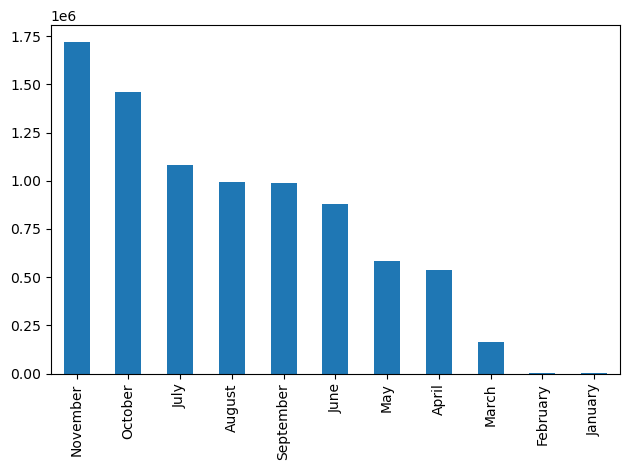

In [14]:
covid_df['month_name'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

### Visualisasi pie chart persentase jumlah gender

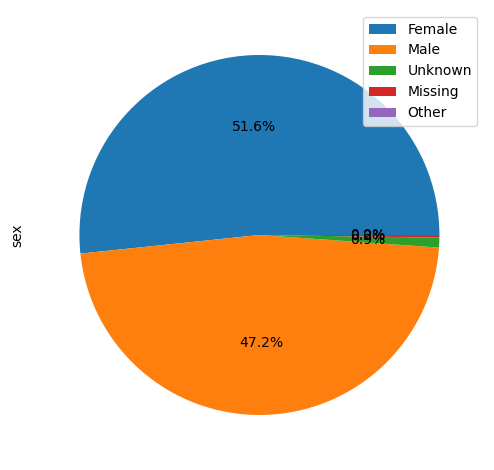

In [15]:
covid_df['sex'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

### Visualisasi bar chart jumlah kelompok usia

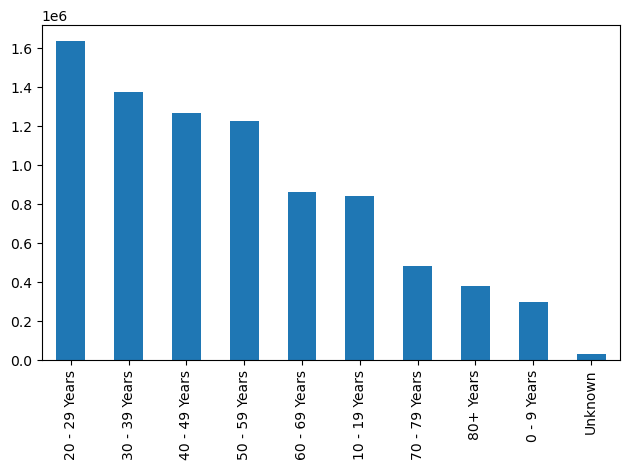

In [16]:
covid_df['age_group'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

### Visualisasi bar chart jenis etnis

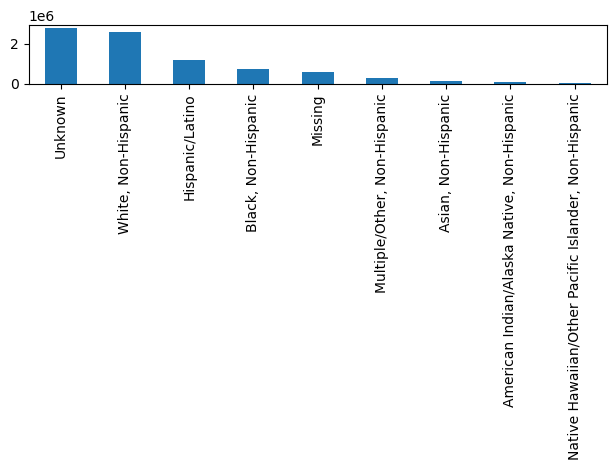

In [17]:
covid_df['Race and ethnicity (combined)'].value_counts().plot.bar()
plt.tight_layout()
plt.show()

### Visualisasi pie chart status individu meninggal

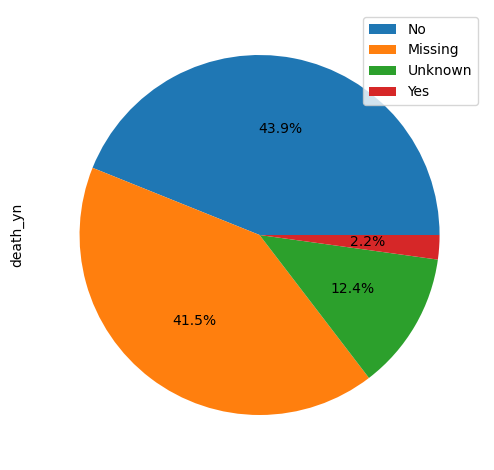

In [18]:
covid_df['death_yn'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

### Bar chart jumlah status individu meninggal per bulan

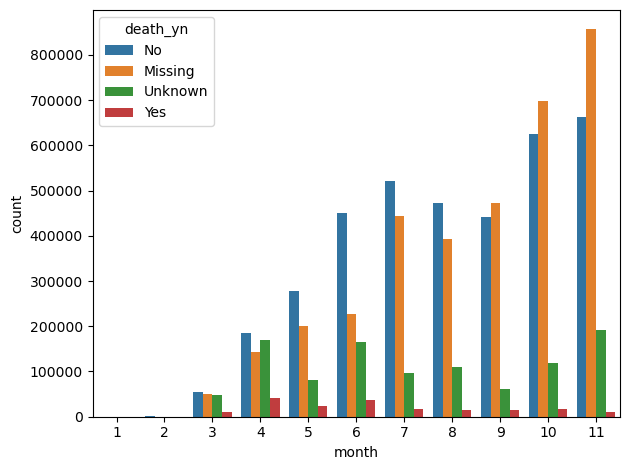

In [19]:
sns.countplot(data=covid_df, x='month', hue='death_yn')
plt.tight_layout()

### Bar chart jumlah status meninggal berdasarkan gender

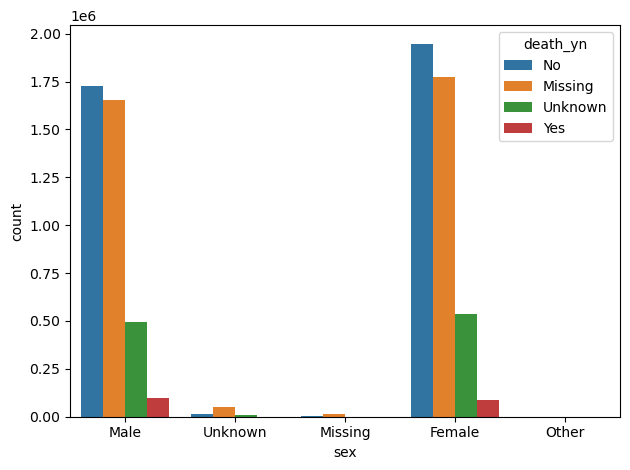

In [20]:
sns.countplot(data=covid_df, x='sex', hue='death_yn')
plt.tight_layout()

### Bar chart jumlah status meninggal berdasarkan gender Male dan Female saja

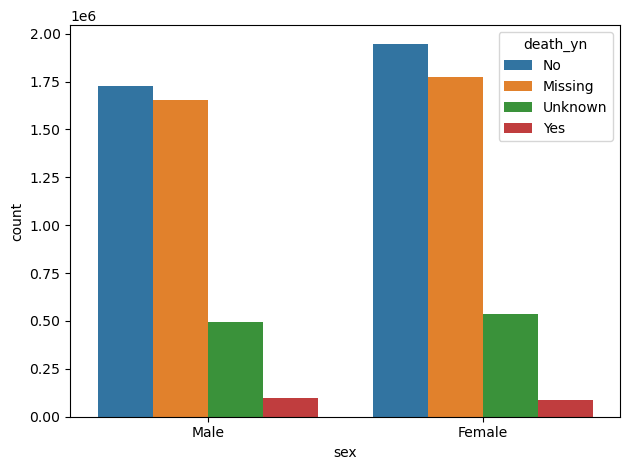

In [21]:
covid_df_sex = covid_df.loc[(covid_df['sex'].isin(['Male', 'Female']))]
sns.countplot(data=covid_df_sex, x='sex', hue = 'death_yn')
plt.tight_layout()

### Bar chart jumlah status meninggal berdasarkan kelompok usia

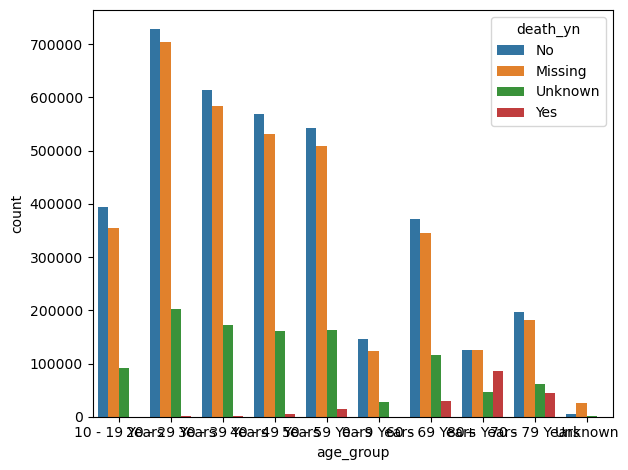

In [22]:
sns.countplot(data=covid_df, x='age_group', hue='death_yn')
plt.tight_layout()

### Pie chart status pasien dirawat di rumah sakit (abaikan Unknown dan missing entries)

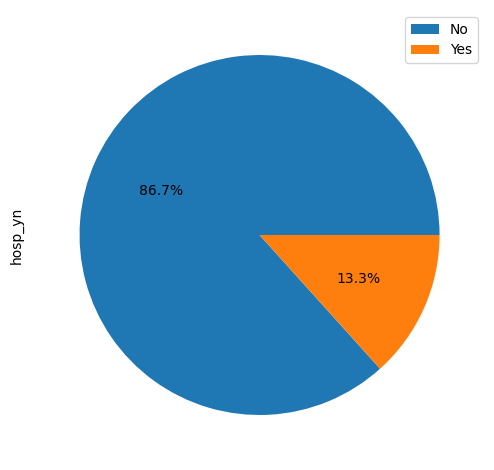

In [23]:
covid_df_hospyn = covid_df.loc[(covid_df['hosp_yn'].isin(['Yes', 'No']))]
covid_df_hospyn['hosp_yn'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()